In [1]:
!pip install yfinance

In [2]:
import yfinance as yf


In [3]:
from datetime import  datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

# New Section

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start,end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head() #shows first five items of dta


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [6]:
google_data.shape


(5024, 6)

In [7]:
google_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5.024000e+03
mean,45.349137,45.829275,44.897326,45.372752,45.322770,1.156790e+08
std,43.460192,43.945442,43.038094,43.499714,43.455224,1.497576e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,13.036074,13.148155,12.882837,13.037694,13.022875,2.732300e+07
50%,26.995692,27.201662,26.795471,27.015369,26.984662,5.537939e+07
75%,60.254499,60.826999,59.870625,60.332750,60.264172,1.423998e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [8]:
google_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5024 entries, 2004-08-19 to 2024-08-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5024 non-null   float64
 1   High       5024 non-null   float64
 2   Low        5024 non-null   float64
 3   Close      5024 non-null   float64
 4   Adj Close  5024 non-null   float64
 5   Volume     5024 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 274.8 KB


In [9]:
google_data.isna().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

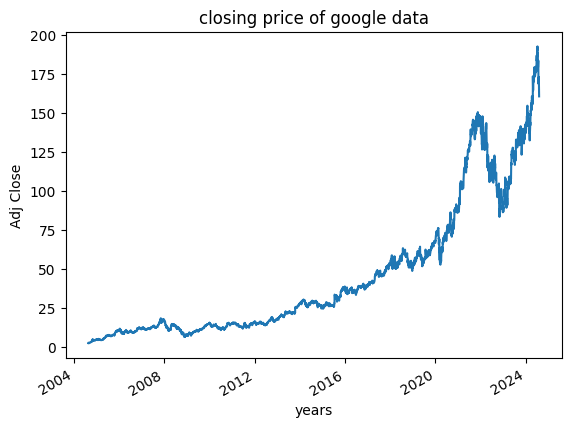

In [10]:
import matplotlib.pyplot as plt
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("closing price of google data")
plt.show()

In [52]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel("column_name")
    plt.title(f"{column_name} of google data")

In [12]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

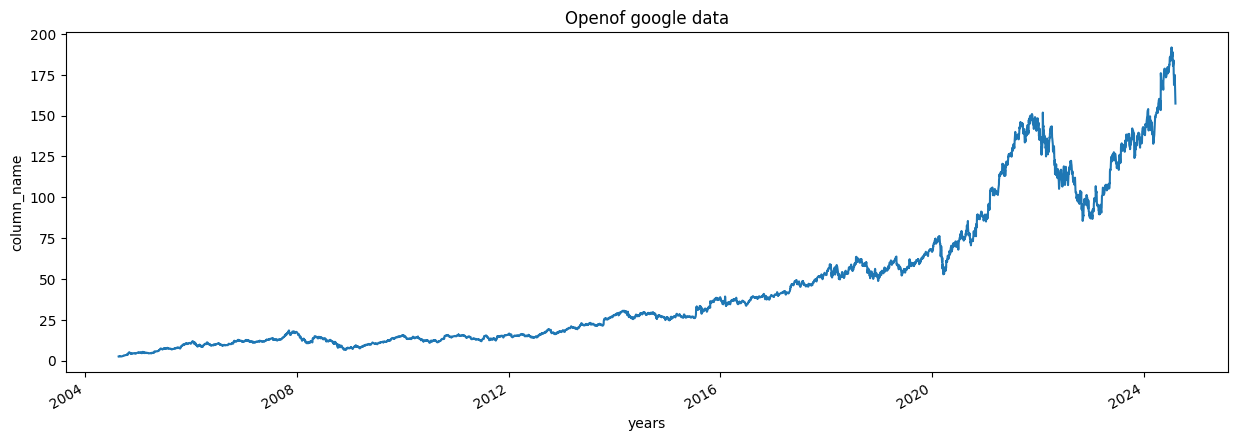

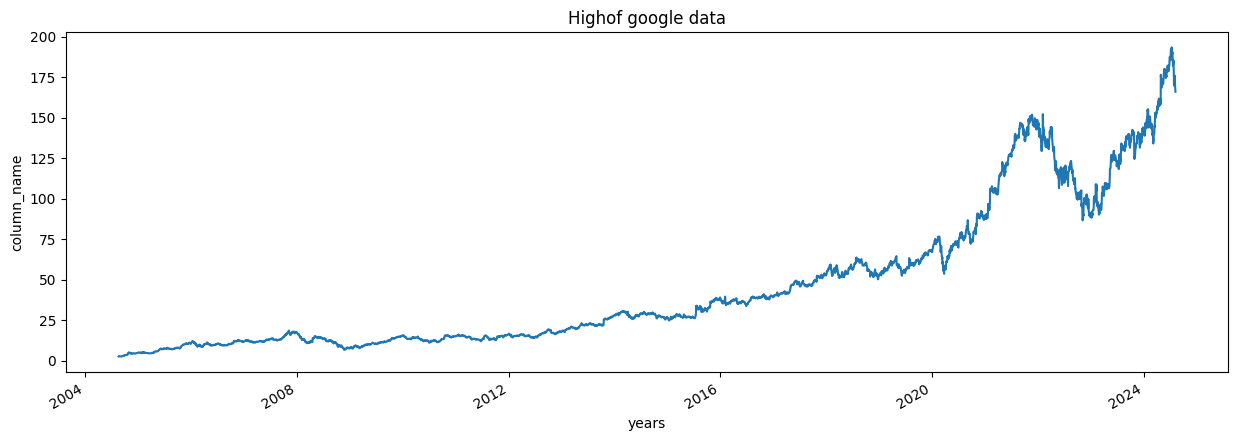

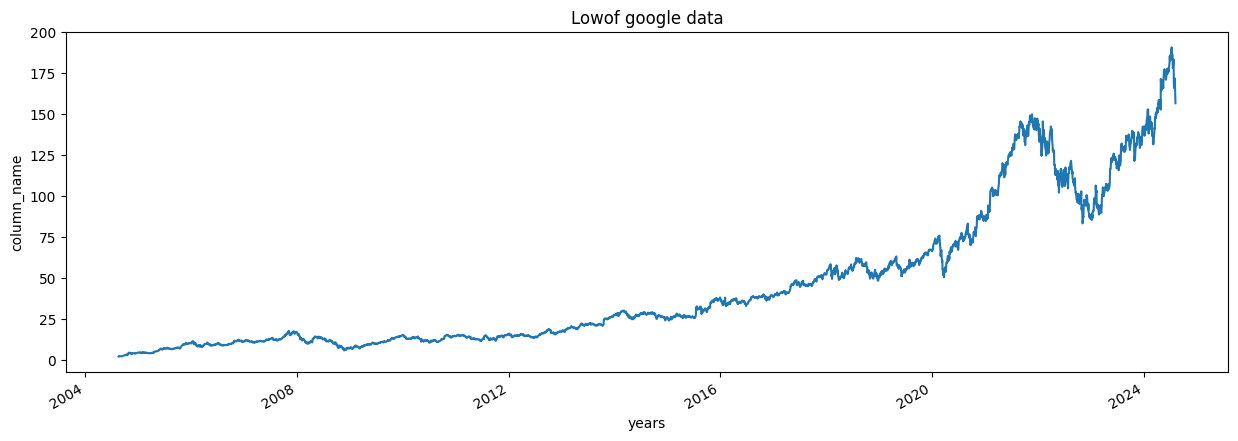

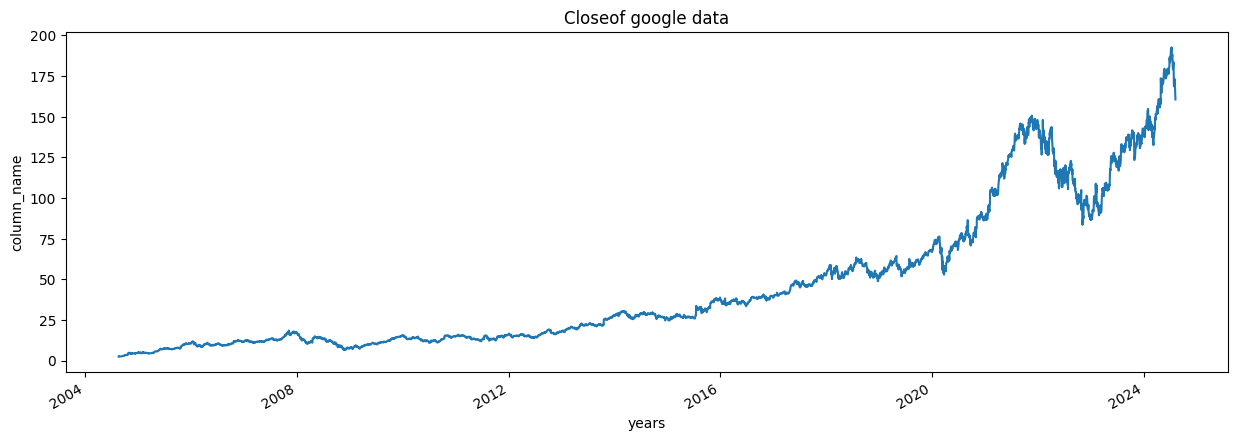

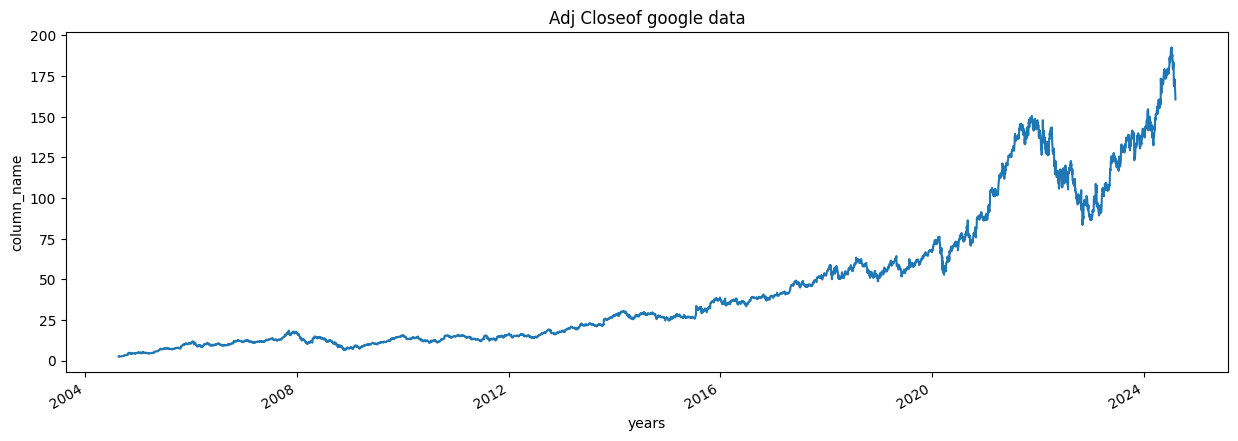

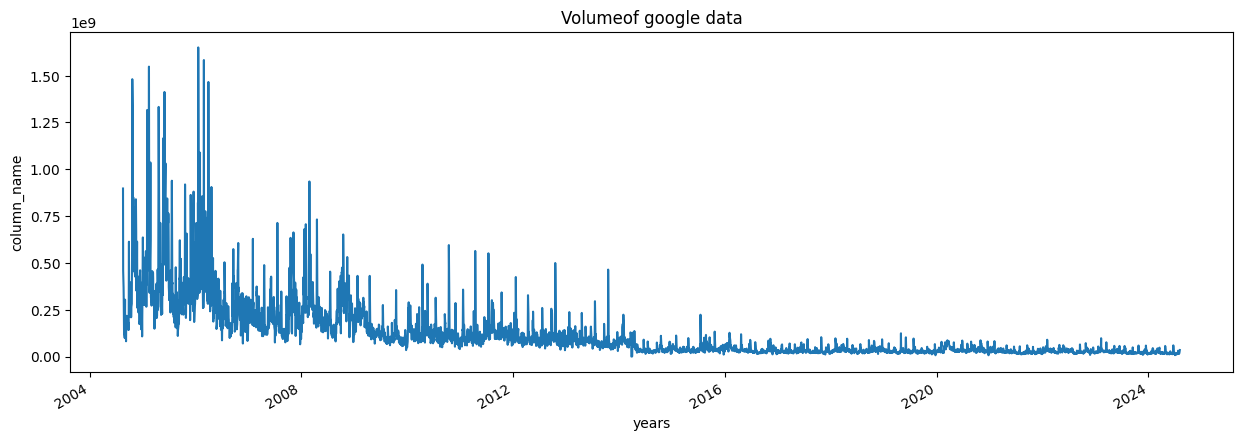

In [13]:
for column in google_data.columns:
    plot_graph((15,5), google_data[column], column)

In [14]:
for i in range(2004,2024):
    print(list(google_data.index.year).count(i))

94
252
251
251
253
252
252
252
250
252
252
252
252
251
251
252
253
252
251
250


In [15]:
google_data['MA_FOR 250_DAYS'] = google_data['Adj Close'].rolling(250).mean()

In [16]:
google_data['MA_FOR 250_DAYS']


Date
2004-08-19           NaN
2004-08-20           NaN
2004-08-23           NaN
2004-08-24           NaN
2004-08-25           NaN
                 ...    
2024-07-30    149.830809
2024-07-31    150.009433
2024-08-01    150.184739
2024-08-02    150.344763
2024-08-05    150.460163
Name: MA_FOR 250_DAYS, Length: 5024, dtype: float64

In [17]:
google_data['MA_FOR 250_DAYS'][0:250].tail()


Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.028317
Name: MA_FOR 250_DAYS, dtype: float64

<Figure size 640x480 with 0 Axes>

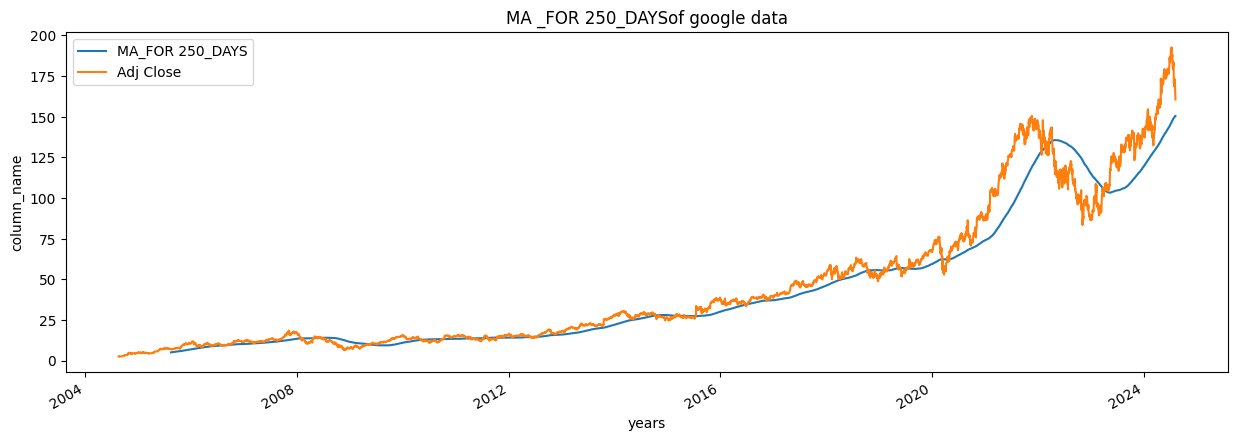

In [18]:
plot_graph((15,5), google_data[['MA_FOR 250_DAYS','Adj Close']],'MA _FOR 250_DAYS')

<Figure size 640x480 with 0 Axes>

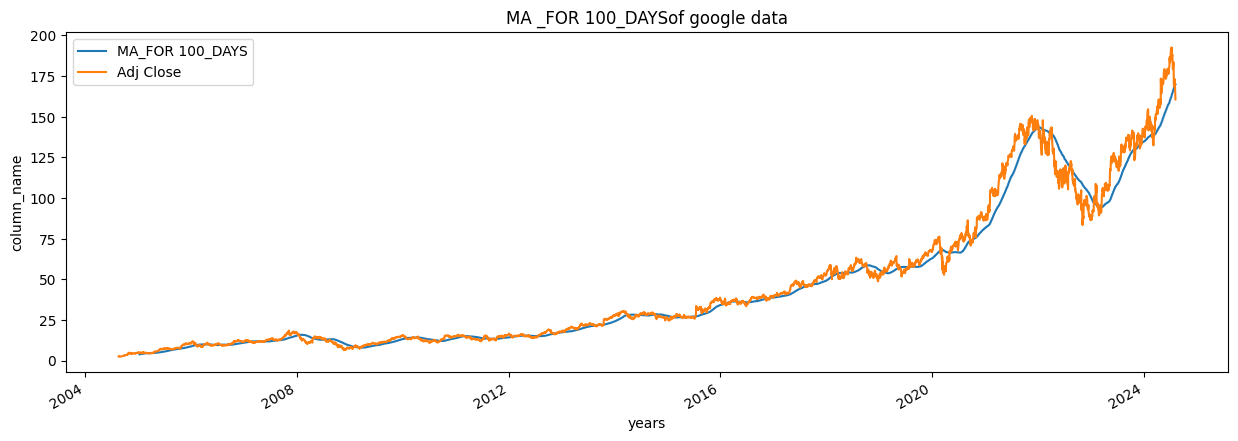

In [19]:
google_data['MA_FOR 100_DAYS']=google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['MA_FOR 100_DAYS','Adj Close']],'MA _FOR 100_DAYS')

<Figure size 640x480 with 0 Axes>

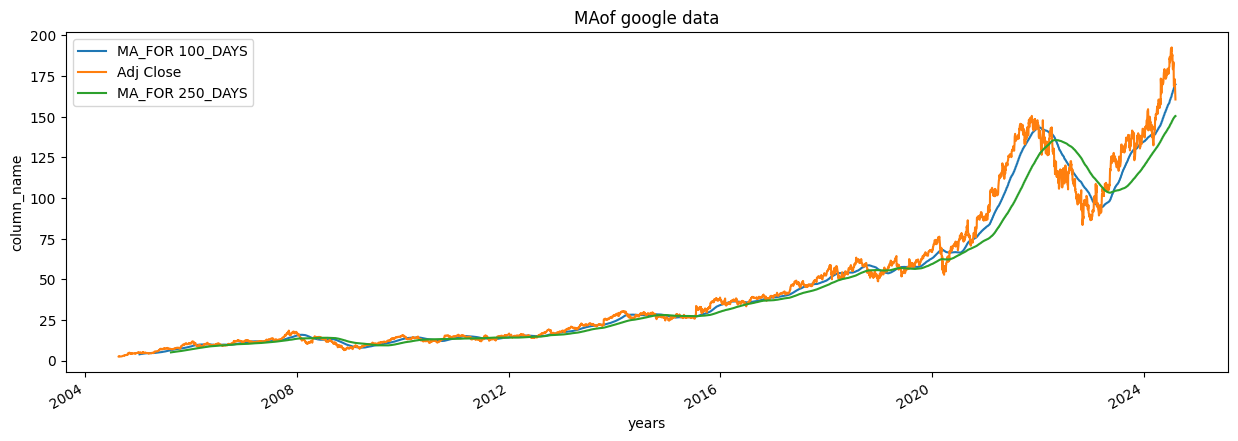

In [20]:
plot_graph((15,5), google_data[['MA_FOR 100_DAYS', 'Adj Close', 'MA_FOR 250_DAYS']], 'MA')


In [21]:
google_data['percentage_change_cp']=google_data['Adj Close'].pct_change()
google_data[['Adj Close', 'percentage_change_cp']].head()


,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.496292,NaN
2004-08-20,2.694573,0.079430
2004-08-23,2.721690,0.010064
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775


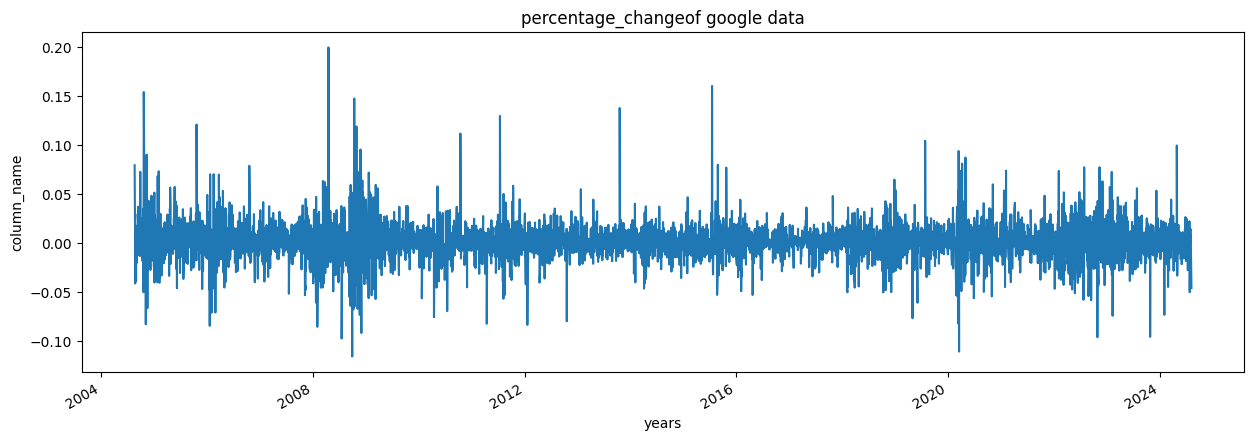

In [22]:
plot_graph((15,5),google_data['percentage_change_cp'], 'percentage_change')


In [23]:
Adj_close_price = google_data[['Adj Close']]
max(Adj_close_price.values), min(Adj_close_price.values)

(array([192.66000366]), array([2.48808169]))

In [24]:
from sklearn.preprocessing import MinMaxScaler


In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.31749279e-05],
       [1.08581220e-03],
       [1.22840556e-03],
       ...,
       [8.93727704e-01],
       [8.72431169e-01],
       [8.31626015e-01]])

In [26]:
len(scaled_data)


5024

In [27]:
x_data = []
y_data = []

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data,y_data = np.array(x_data), np.array(y_data)

In [28]:
x_data[0], y_data[0]

(array([[4.31749279e-05],
        [1.08581220e-03],
        [1.22840556e-03],
        [6.35788989e-04],
        [7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.3

In [29]:
int(len(x_data)*0.7)


3446

In [30]:
5024-100-int(len(x_data)*0.7)


1478

In [31]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]


In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3446, 100, 1)
(3446, 1)
(1478, 100, 1)
(1478, 1)


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

print("TensorFlow and Keras are successfully imported.")


TensorFlow and Keras are successfully imported.


In [36]:
model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [38]:
model.fit(x_train, y_train,batch_size=1, epochs=3 )

Epoch 1/3
3446/3446 ━━━━━━━━━━━━━━━━━━━━ 324s 93ms/step - loss: 1.9351e-04
Epoch 2/3
3446/3446 ━━━━━━━━━━━━━━━━━━━━ 305s 89ms/step - loss: 5.6503e-05
Epoch 3/3
3446/3446 ━━━━━━━━━━━━━━━━━━━━ 423s 118ms/step - loss: 3.6078e-05


In [39]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [40]:
predictions = model.predict(x_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step


In [41]:
predictions

array([[0.2925255 ],
       [0.29462928],
       [0.29817915],
       ...,
       [0.9003374 ],
       [0.89695907],
       [0.87780356]], dtype=float32)

In [42]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 58.11822 ],
       [ 58.5183  ],
       [ 59.193386],
       ...,
       [173.70697 ],
       [173.06451 ],
       [169.42168 ]], dtype=float32)

In [43]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.48794556],
       [ 59.27604294],
       [ 58.23822784],
       ...,
       [172.44999695],
       [168.3999939 ],
       [160.63999939]])

In [44]:
rmse = np.sqrt(np.mean(inv_predictions-inv_y_test)**2)

In [45]:
rmse

0.36064810230219

In [50]:
import pandas as pd
plotting_data = pd.DataFrame(
    {
        'Original_test_data'  : inv_y_test.reshape(-1),
        'Predictions' : inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
    )
plotting_data.tail()

,Original_test_data,Predictions
Date,,
2024-07-30,171.860001,171.581009
2024-07-31,173.149994,172.661301
2024-08-01,172.449997,173.706970
2024-08-02,168.399994,173.064514
2024-08-05,160.639999,169.421677


<Figure size 640x480 with 0 Axes>

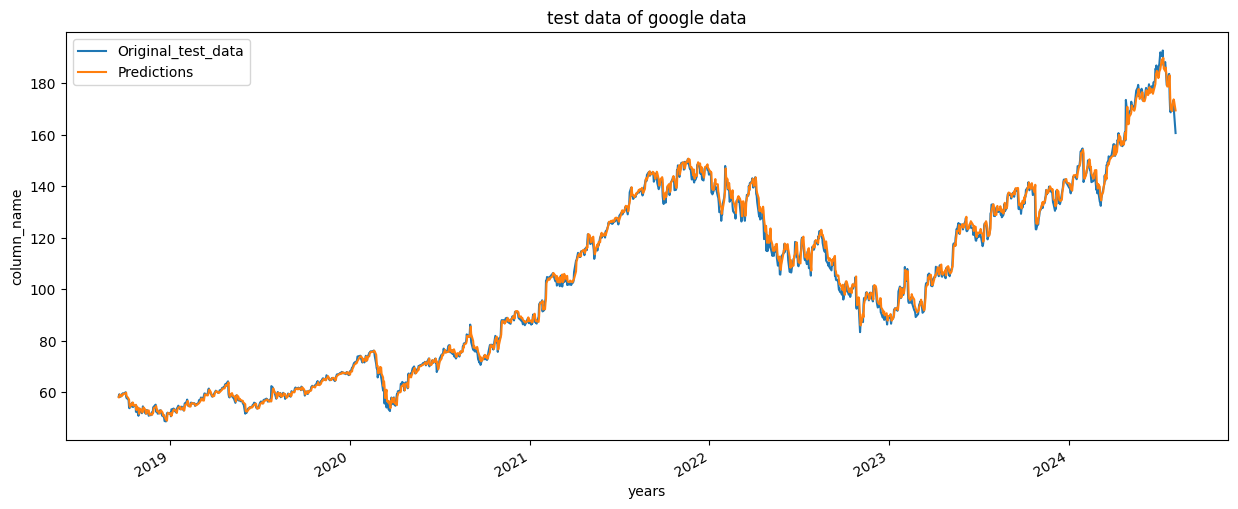

In [53]:
plot_graph((15,6),plotting_data,'test data')

<Figure size 640x480 with 0 Axes>

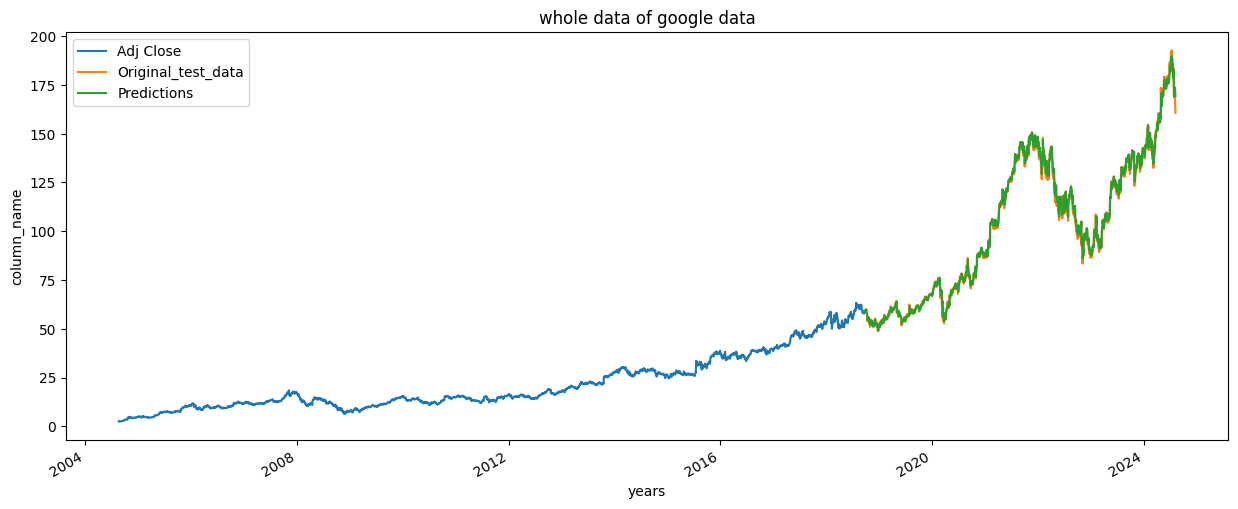

In [54]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],plotting_data], axis=0), 'whole data')

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(inv_y_test, inv_predictions)
mse = mean_squared_error(inv_y_test, inv_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(inv_y_test, inv_predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 1.5138499475461058
Mean Squared Error: 4.7717379144691545
Root Mean Squared Error: 2.184430798736631
R-squared: 0.9962442904495176


## **Residual Plot**

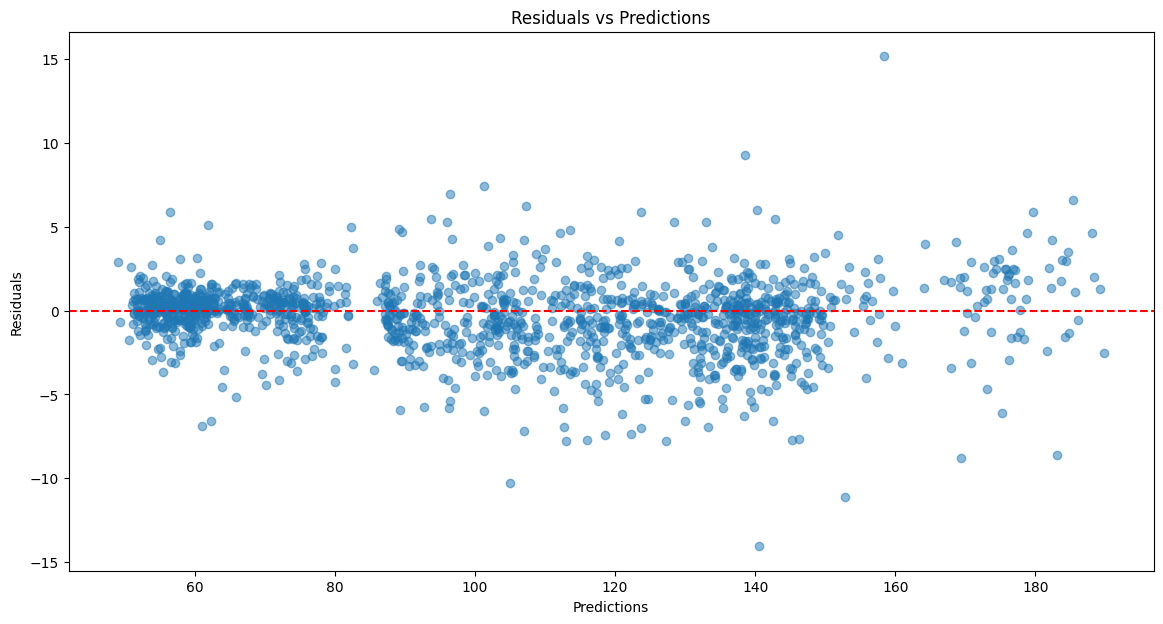

In [56]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = inv_y_test - inv_predictions

# Plot residuals
plt.figure(figsize=(14, 7))
plt.scatter(inv_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs Predictions')
plt.show()


# **Error Distribution Plot**

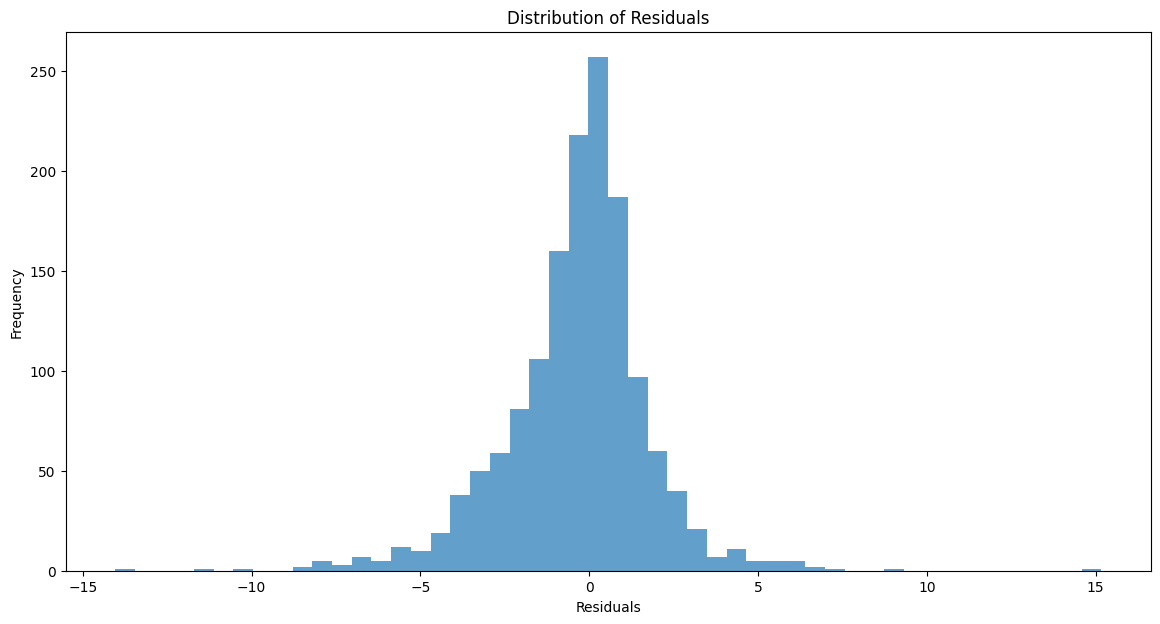

In [57]:
plt.figure(figsize=(14, 7))
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


# **Prediction vs. Actual Plot**

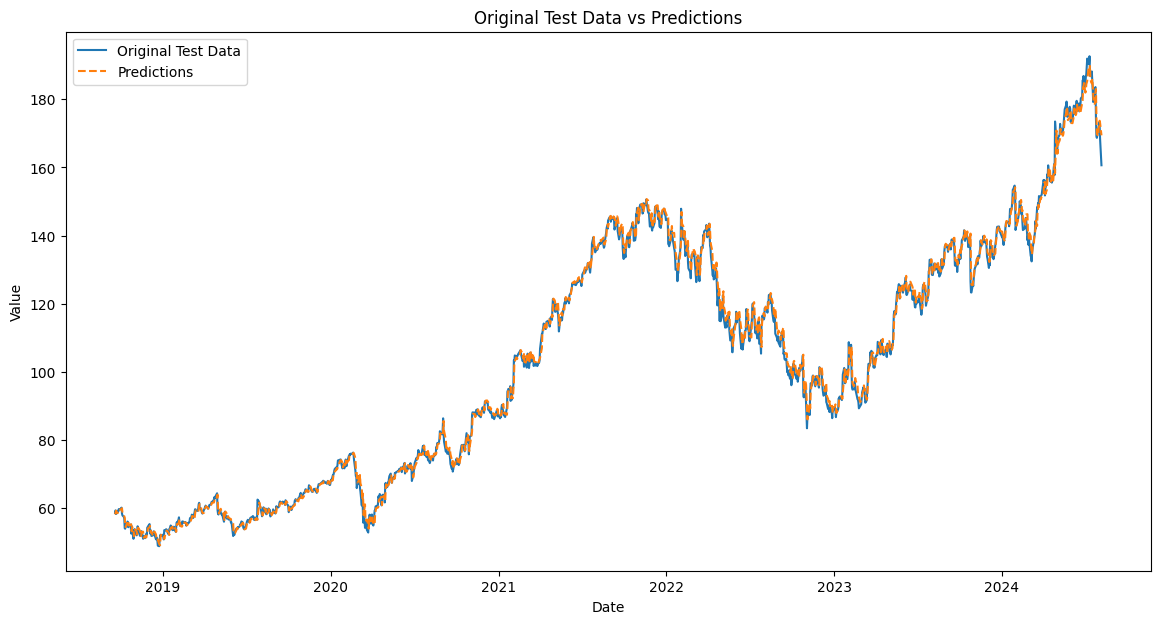

In [58]:
plt.figure(figsize=(14, 7))
plt.plot(plotting_data.index, plotting_data['Original_test_data'], label='Original Test Data')
plt.plot(plotting_data.index, plotting_data['Predictions'], label='Predictions', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Test Data vs Predictions')
plt.legend()
plt.show()


MAPE: 1.50%


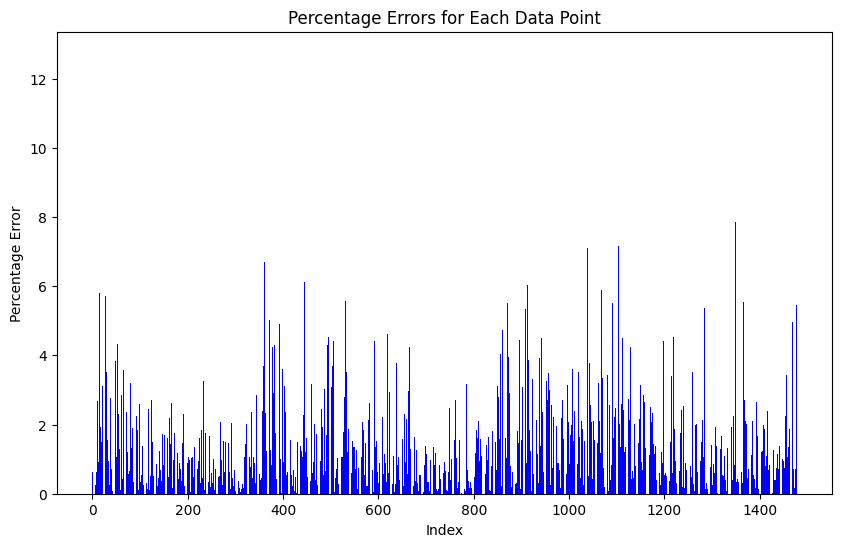

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `inv_y_test` and `inv_predictions` are your actual and predicted values
actual_values = inv_y_test.reshape(-1)
predicted_values = inv_predictions.reshape(-1)

# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
print(f'MAPE: {mape:.2f}%')

# Plot Percentage Errors
percentage_errors = np.abs((actual_values - predicted_values) / actual_values) * 100

plt.figure(figsize=(10, 6))
plt.bar(range(len(percentage_errors)), percentage_errors, color='blue')
plt.xlabel('Index')
plt.ylabel('Percentage Error')
plt.title('Percentage Errors for Each Data Point')
plt.show()


COD (R-squared): 1.00


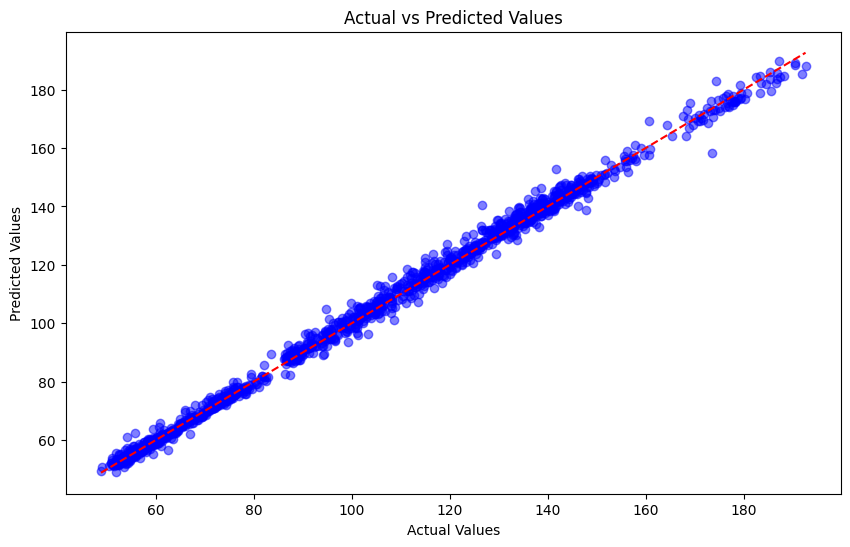

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `inv_y_test` and `inv_predictions` are your actual and predicted values
actual_values = inv_y_test.reshape(-1)
predicted_values = inv_predictions.reshape(-1)

# Calculate COD (R-squared)
ss_res = np.sum((actual_values - predicted_values) ** 2)
ss_tot = np.sum((actual_values - np.mean(actual_values)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f'COD (R-squared): {r2:.2f}')

# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.5)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


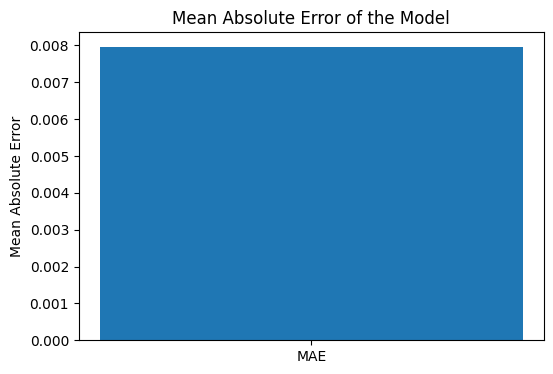

In [59]:
import matplotlib.pyplot as plt

# Assuming mae_value is the computed MAE
mae_value = mean_absolute_error(y_test, predictions)

plt.figure(figsize=(6, 4))
plt.bar(['MAE'], [mae_value])
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of the Model')
plt.show()


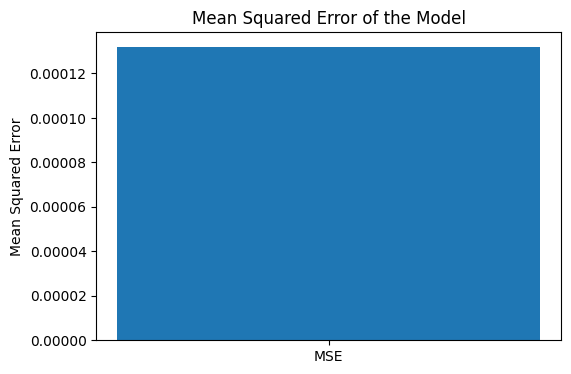

In [60]:
from sklearn.metrics import mean_squared_error

# Assuming mse_value is the computed MSE
mse_value = mean_squared_error(y_test, predictions)

plt.figure(figsize=(6, 4))
plt.bar(['MSE'], [mse_value])
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of the Model')
plt.show()


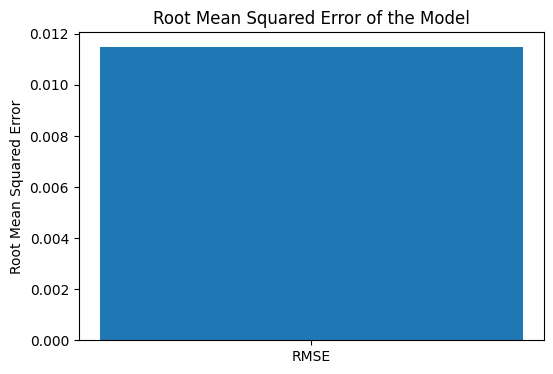

In [61]:
import numpy as np

# Calculate RMSE
rmse_value = np.sqrt(mean_squared_error(y_test, predictions))

plt.figure(figsize=(6, 4))
plt.bar(['RMSE'], [rmse_value])
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error of the Model')
plt.show()


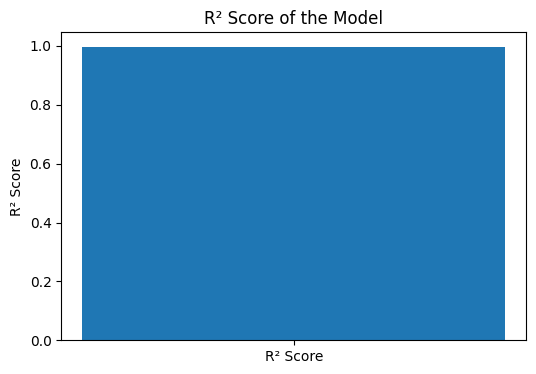

In [62]:
from sklearn.metrics import r2_score

# Calculate R² score
r2_value = r2_score(y_test, predictions)

plt.figure(figsize=(6, 4))
plt.bar(['R² Score'], [r2_value])
plt.ylabel('R² Score')
plt.title('R² Score of the Model')
plt.show()
